<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/My_titanic_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/files")

In [2]:
#Install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Find out what data look like

train_df = pd.read_csv('ttn_train.csv')
test_df = pd.read_csv('tn_test.csv')

print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head() #Column Survived가 없다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Check nulls
train_df.isnull().sum()
# Cabin & Age have nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_df.info()
# 5 objects catagories and 2 float catagories that I need to deal with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

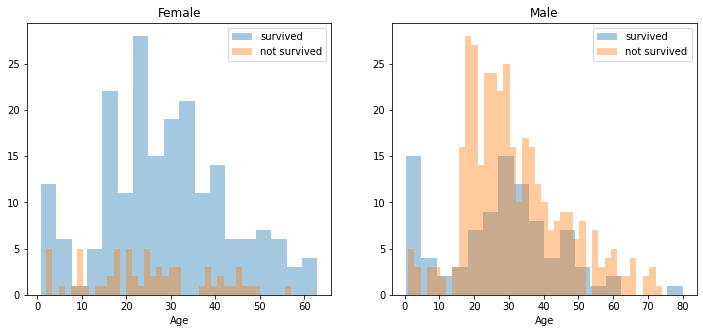

In [8]:
# Age and Sex visualization
survived='survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
men = train_df[train_df['Sex'] == 'male']
women = train_df[train_df['Sex'] == 'female']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, kde=False, label=not_survived, ax=axes[0])
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, kde=False, ax=axes[1])
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, kde=False, ax=axes[1])
ax.legend()
ax.set_title('Male')




/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


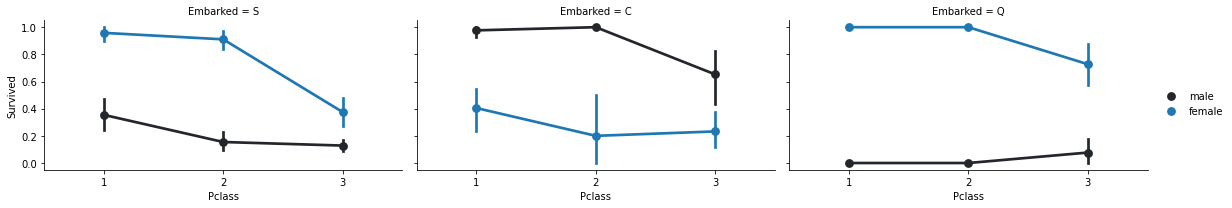

In [9]:
#Embarked, Pclass and Sex

FacetGrid=sns.FacetGrid(train_df, col='Embarked',aspect=1.8)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived','Sex')
FacetGrid.add_legend()

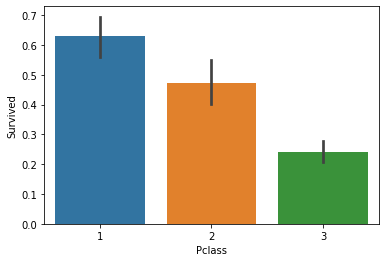

In [10]:
# Pclass

sns.barplot(x='Pclass', y='Survived', data=train_df)


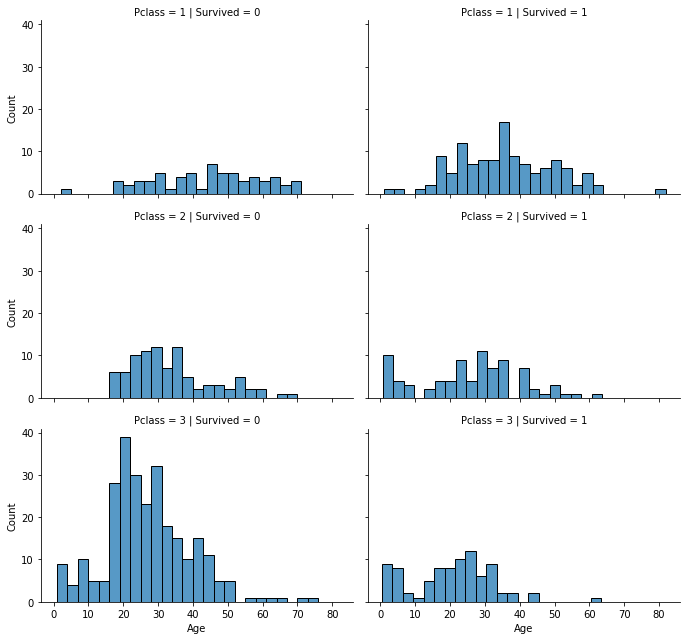

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(sns.histplot, 'Age', binwidth=3)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/

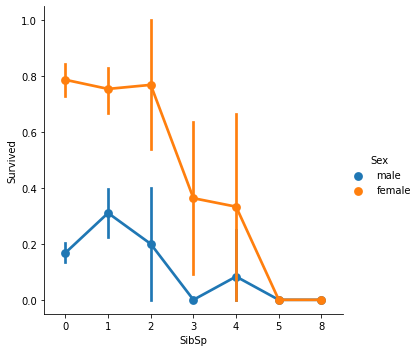

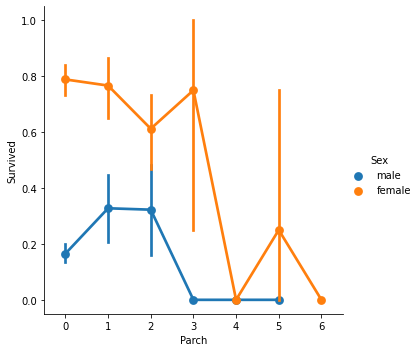

In [12]:
#SipSp
ax = sns.factorplot('SibSp', 'Survived', data=train_df, hue='Sex')
ax = sns.factorplot('Parch', 'Survived', data=train_df, hue='Sex')

# Data Preprocessing

In [13]:
train_df = train_df.drop(columns='PassengerId', axis=1)

In [14]:
#Deal with Missing data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [15]:
# Age : class별 나이 평균으로 넣어주자 / Train , test data 둘다. 

data = [train_df, test_df]

for dataset in data:
  dataset['Age'] =dataset.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.mean())).astype(int)


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 36.0+ KB


In [17]:
# Ticket은 drop

data=[train_df, test_df]
for dataset in data:
  dataset.drop(columns='Ticket', axis=1, inplace=True)    

In [18]:
#Embarked

train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data=[train_df, test_df]
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [20]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S


In [21]:
#Name에서 추출하여 Title 컬럼 새로 만들기

data=[train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  dataset['Title']=dataset['Title'].map(titles)
  dataset['Title']=dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)





In [22]:
# Coverting dtypes 
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    object 
 9   Title     891 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 69.7+ KB


In [23]:
#Sex: int로 변환(encoding)

data=[train_df, test_df]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].replace({'male':0, 'female':1})

In [24]:
#Embarked: int로 변환(encoding)

data=[train_df, test_df]

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].replace({'S':0, 'C':1, 'Q':2})

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  891 non-null    int64  
 9   Title     891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB


In [26]:
#Fare grouping
data=[train_df, test_df]

for dataset in data:
  #Fare를 10단위로
  dataset.loc[ dataset['Fare'] <= 5, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 5) & (dataset['Fare'] <= 15), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 25), 'Fare'] = 2
  dataset.loc[(dataset['Fare'] > 25) & (dataset['Fare'] <= 35), 'Fare'] = 3
  dataset.loc[(dataset['Fare'] > 35) & (dataset['Fare'] <= 45), 'Fare'] = 4
  dataset.loc[(dataset['Fare'] > 45) & (dataset['Fare'] <= 55), 'Fare'] = 5
  dataset.loc[(dataset['Fare'] > 55) & (dataset['Fare'] <= 65), 'Fare'] = 6
  dataset.loc[(dataset['Fare'] > 65) & (dataset['Fare'] <= 75), 'Fare'] = 7
  dataset.loc[ dataset['Fare'] > 75, 'Fare'] = 8

In [27]:
train_df['Fare'] = train_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].fillna(0)
test_df['Fare'] = test_df['Fare'].astype(int)

In [28]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,1,NaN,0,1
1,1,1,1,38,1,0,7,C85,1,3
2,1,3,1,26,0,0,1,NaN,0,2
3,1,1,1,35,1,0,5,C123,0,3
4,0,3,0,35,0,0,1,NaN,0,1


# Adding new categories

In [29]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [30]:
# Pclass와 Deck을 합쳐보자

data=[train_df, test_df]

for dataset in data:
  dataset['pclass_deck'] = dataset['Pclass'] + dataset['Deck']
  



In [31]:
# Age group
data=[train_df, test_df]

for dataset in data:

   #11보다 작은 값을 가진 컬럼들이 쭉 나오는데 뒤에 'Age'가 있음으로 'AGE' 컬럼만 선택되는 원리임.
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck,pclass_deck
0,0,3,0,2,1,0,1,0,1,8,11
1,1,1,1,5,1,0,7,1,3,3,4
2,1,3,1,3,0,0,1,0,2,8,11
3,1,1,1,5,1,0,5,0,3,3,4
4,0,3,0,5,0,0,1,0,1,8,11


In [33]:
#Family

data=[train_df, test_df]

for dataset in data:
  dataset['Family'] = dataset['SibSp'] + dataset['Parch'] +1


train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['SibSp', 'Parch'], axis=1,inplace=True)



# Building Models

In [34]:
# Data Split
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Deck,pclass_deck,Family
0,0,3,0,2,1,0,1,8,11,2
1,1,1,1,5,7,1,3,3,4,2
2,1,3,1,3,1,0,2,8,11,1
3,1,1,1,5,5,0,3,3,4,2
4,0,3,0,5,1,0,1,8,11,1


In [61]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1)

In [62]:
# Try RandomForest First

# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# y_preds = rf.predict(X_test)

# acc_random_forest = round(rf.score(X_train, y_train)*100,2)
# acc_random_forest


In [63]:
# from sklearn.tree import DecisionTreeClassifier
# decision_tree = DecisionTreeClassifier() 
# decision_tree.fit(X_train, y_train)  
# y_preds = decision_tree.predict(X_test)  
# acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
# acc_decision_tree


In [64]:
import lightgbm as lgb
light_gbm = lgb.LGBMClassifier()
light_gbm.fit(X_train, y_train)
y_preds = light_gbm.predict(X_test)
acc_lgb = round(light_gbm.score(X_train, y_train) * 100, 2)
acc_lgb

89.0

In [65]:
# import xgboost as xgb

# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(X_train, y_train)
# y_preds = xgb_model.predict(X_test)
# acc_xgb = round(xgb_model.score(X_train, y_train) * 100, 2)
# acc_xgb



In [66]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# y_preds = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, y_train)*100, 2)
# acc_knn

In [67]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)
# y_preds = svc.predict(X_test)
# acc_svc = round(svc.score(X_train, y_train)*100, 2)
# acc_svc

In [68]:
#Best Model Selection

# results = pd.DataFrame({'Model':['KNN', 'XGBoost', 'LightGBM','DecisionTree','RandomForest','SVM'],'Score': [acc_knn,acc_xgb,acc_lgb,acc_decision_tree,acc_random_forest, acc_svc]})
# result_df = results.sort_values(by='Score', ascending=False).set_index('Score')
# result_df

In [69]:
#KFold
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# kfold = KFold()
# mean=[]
# accuracy=[]
# std=[]

# classifiers=['KNN', 'XGBoost', 'LightGBM','DecisionTree','RandomForest','SVM']
# models = [KNeighborsClassifier(),xgb.XGBClassifier(),lgb.LGBMClassifier(), DecisionTreeClassifier(),RandomForestClassifier(),SVC()]

# for i in models:
#   model = i
#   cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
#   cv_result = cv_result
#   mean.append(cv_result.mean())
#   std.append(cv_result.std())

# kfold_models_dataframe = pd.DataFrame({'CV Mean': mean, 'Std': std}, index=classifiers)
# kfold_models_dataframe


In [70]:
# importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(light_gbm.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# importances.head(10)

In [71]:
#submission
submission = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': y_preds}).set_index('PassengerId')



In [72]:
submission.to_csv('submission.csv')